In [2]:
%run '../dynamo_helper_functions.ipynb'

/tmp/ipykernel_2488095/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


['/net/capricorn/home/xing/soh29/.conda/envs/dynamo_06_2024/lib/python3.8/site-packages/dynamo']


package umap-learn trimap    tqdm statsmodels setuptools seaborn   scipy  \
version      0.5.6  1.1.4  4.66.4      0.14.1     70.1.0  0.13.2  1.10.1   

package scikit-learn python-igraph pynndescent pre-commit pandas   numpy  \
version        1.3.2        0.11.5       0.5.8      3.5.0  1.2.0  1.23.0   

package numdifftools   numba networkx matplotlib loompy hdbscan  \
version       0.9.41  0.51.2      3.1      3.7.5  3.0.7  0.8.37   

package dynamo-release cvxopt colorcet  
version          1.0.0  1.3.2    3.1.0

In [33]:
import copy

In [1]:
data_names = [0,12.5,25,50,100,200,400,800]
#fig_path = "fig2_plots/"
colors = {'G1.S':'firebrick', 'S':'orange', 'G2':'yellowgreen', 'G2.M':'teal', 'M.G1':'royalblue'}
colors2 = {'G1-S':'firebrick', 'S':'orange', 'G2-M':'yellowgreen', 'M':'teal', 'M-G1':'royalblue'} #Dynamo

# Load data

In [3]:
adata = dyn.read_loom("../../data/static_MCF10A/processed_possorted_genome_bam_RIG79.loom")
temp = np.empty((len(adata.obs),1), dtype=object)
temp.shape
for i in range(len(adata.obs)):
    temp[i] = str(int(float(adata.obs['dosage'][i])))
adata.obs['dosage'] = temp

In [4]:
# MCF10A data with density
same_ref_with_density = reload_data("../../data/static_MCF10A/generated_data/With_density/Same_Ref_With_Density_vf_", 
                                    '../../data/static_MCF10A/generated_data/With_density/uns_dict_')

In [5]:
# MCF10A data without density
same_ref_without_density = reload_data("../../data/static_MCF10A/generated_data/Without_density/Same_Ref_Without_Density_vf_", 
                                       '../../data/static_MCF10A/generated_data/Without_density/uns_dict_')

In [7]:
dc_mat_0 = pd.read_csv("../../data/static_MCF10A/generated_data/Revelio_output/DC_dose_0.csv", index_col=0)
dc_mat_12 = pd.read_csv("../../data/static_MCF10A/generated_data/Revelio_output/DC_dose_12.csv", index_col=0)

In [8]:
dose_data = []
for i in range(4):
    temp = pd.read_csv('../../data/static_MCF10A/generated_data/Revelio_output/DC_dose_'+str(doses[i])+'.csv', index_col=0)
    dose_data.append(temp)

# Process data

## Dose 12.5

In [9]:
# Subset dose 12.5 pM tgfb treated cells
i=1
dose = str(doses[i])
dose_adata = adata[(dose == adata.obs['dosage'])]

In [10]:
# Find intersecting indexes between revelio and raw dataset
dose_index = dose_adata.obs.index
cc_index = dose_data[i].index
cells_intersect = np.intersect1d(dose_index, cc_index)

In [11]:
new_adata = dose_adata[cells_intersect,:]
dose_data[i] = dose_data[i].reindex(new_adata.obs.index)

cols = dose_data[i].columns[2:9].tolist()
cols.insert(0, 'RC nneighbor')

coords = np.array(dose_data[i][cols])
dose12 = dose_adata[dose_data[1].index,:]

In [12]:
# Process the data 
dyn.pp.recipe_monocle(dose12, n_top_genes=2000, keep_filtered_genes=True)
dyn.tl.dynamics(dose12, model='deterministic', cores=3)
dyn.tl.reduceDimension(dose12)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...


{'filter_bool': None, 'layer': 'all', 'min_cell_s': 12.280000000000001, 'min_cell_u': 6.140000000000001, 'min_cell_p': 6.140000000000001, 'min_avg_exp_s': 0, 'min_avg_exp_u': 0, 'min_avg_exp_p': 0, 'max_avg_exp': inf, 'min_count_s': 0, 'min_count_u': 0, 'min_count_p': 0, 'shared_count': 30}


|-----> calculating size factor...
|-----> selecting genes...


                             Accession  Chromosome       End     Start Strand  \
BX004987.1           ENSG00000278704.1  GL000009.2     58376     56140      -   
AC145212.1           ENSG00000277400.1  GL000194.1    115018     53590      -   
MAFIP                ENSG00000274847.1  GL000194.1    115055     53594      -   
Y_RNA                ENSG00000277428.1  GL000195.1     37534     37434      -   
AC011043.1           ENSG00000276256.1  GL000195.1     49164     42939      -   
...                                ...         ...       ...       ...    ...   
DPH3P2-1       ENSG00000237040.6_PAR_Y           Y  57062405  57062156      +   
VAMP7-1       ENSG00000124333.16_PAR_Y           Y  57130289  57067865      +   
IL9R-1        ENSG00000124334.17_PAR_Y           Y  57197337  57184101      +   
AJ271736.1-1   ENSG00000270726.6_PAR_Y           Y  57208756  57190738      +   
WASH6P-1      ENSG00000182484.15_PAR_Y           Y  57212230  57207346      +   

              nCells  nCoun

|-----> <insert> frac to var in AnnData Object.


sort by:  SVR
adata shape:  (1228, 60668)
adata shape:  (1228, 2000)
layer:  X
CM:  (1228, 2000)
CM:  (1228, 2000)
detected_bool:  [ True  True  True ...  True  True  True]
valid CM:  (1228, 2000)
mu:  [0.29736155 0.4621809  0.15675618 ... 0.22327769 0.34397694 1.359357  ]
mu shape:  (2000,)
log_m:  [-1.74971    -1.1134704  -2.673406   ... -2.163089   -1.5396162
  0.44292438]


|-----> size factor normalizing the data, followed by log1p transformation.
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|
|-----> [cell phase estimation] finished [345.0111s]
|-----> <insert> cell_cycle_phase to obs in AnnData Object.
|-----> <insert> cell_cycle_scores to obsm in AnnData Object.
|
|-----> [Cell Cycle Scores Estimation] finished [0.2720s]
|
|-----> [recipe_monocle preprocess] finished [3.6787s]
|-----> calculating first/second moments begins...


X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


|
|-----> [moments calculation] finished [12.0032s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.5
n_components:  2


|
|-----> [dimension_reduction projection] finished [9.3639s]


In [13]:
# Add DC dimensions
dose12.obsm['X_DC'] = np.array(dose_data[1][['DC1','DC2','DC3','DC4','DC5','DC6','DC7','DC8','DC9','DC10']])

In [14]:
dyn.tl.cell_wise_confidence(dose12)
dose12.obsm['X_RC'] = np.array(dose_data[1][cols].reindex(dose12.obs.index))

X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


In [15]:
# vector field on UMAP representation
dyn.tl.cell_velocities(dose12, basis = 'umap', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose12, basis='umap', M=1000)

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.9513s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.5701s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1228, 2)
neighs:  [[ 144 1120  334 ...  132  306  460]
 [ 144 1120  334 ...  947 1025  885]
 [ 144 1120  334 ...  108  185  965]
 ...
 [  29  840 1029 ...  913  935 1062]
 [ 840   29  173 ... 1174  937  935]
 [ 840   29  173 ...  386  935  937]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [6.92232823e-076 1.65090829e-066 7.21133701e-059 ... 1.36104040e+001
  1.36507756e+001 8.54995674e+000]
 [1.84455811e-089 4.39909268e-080 1.92156887e-072 ... 1.00323225e+001
  1.40319305e+001 1.40324287e+001]
 [9.00232268e-105 2.14696689e-095 9.37817192e-088 ... 9.45808606e+000
  1.87871088e+000 1.37736105e+000]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  

|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> <insert> control_point_umap to obs in AnnData Object.
|-----> <insert> inlier_prob_umap to obs in AnnData Object.
|-----> <insert> obs_vf_angle_umap to obs in AnnData Object.
|
|-----> [VectorField] finished [9.0449s]


In [17]:
# Vector field on cell cycle-EMT representation
dyn.tl.cell_velocities(dose12, basis = 'RC', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose12, basis='RC', M=1000)
dyn.vf.topography(dose12, basis='RC')

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.9944s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.5901s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: RC. 
        Vector field will be learned in the RC space.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1228, 2)
neighs:  [[107 643 278 ... 519 921 567]
 [107 643 278 ... 567 300 686]
 [117 270  85 ... 315 487 161]
 ...
 [584 351 642 ... 472 169 130]
 [584 351 696 ... 751 745 889]
 [584 351 696 ... 745 119 184]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[6.64899873e-012 5.53052091e-012 3.22214873e-010 ... 3.95874944e-007
  1.93930486e-004 2.17986772e-004]
 [3.40836242e-009 2.84110528e-009 4.70654139e-008 ... 4.44097026e-005
  1.08063677e-002 1.17020931e-002]
 [7.55972517e-007 6.33017441e-007 2.93932379e-006 ... 2.94463926e-003
  2.71432752e-001 2.67984343e-001]
 ...
 [3.53604100e+000 2.93581098e+000 3.70177046e-001 ... 1.59621707e-106
  5.22664489e-106 1.32723046e-109]
 [3.59431624e+000 2.98419078e+000 6.22283947e-002 ... 1.33236998e-115
  4.36270533e-115 1.10784558e-118]
 [1.55701476e+000 1.29271547e+000 4.51439277e-003 ... 4.73948390e-125
  1.55189414e-124 3.94080950e-128]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  [[ True  True  True ...  True False 

|-----> <insert> velocity_RC_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_RC_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_RC to uns in AnnData Object.
|-----> <insert> control_point_RC to obs in AnnData Object.
|-----> <insert> inlier_prob_RC to obs in AnnData Object.
|-----> <insert> obs_vf_angle_RC to obs in AnnData Object.
|
|-----> [VectorField] finished [8.8749s]


AnnData object with n_obs × n_vars = 1228 × 60668
    obs: 'dosage', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'CC', 'control_point_RC', 'inlier_prob_RC', 'obs_vf_angle_RC'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'umap_fit', 'grid_veloci

In [16]:
# Add the estimated cell cycle phase from Revelio
i=1
CC = dose_data[i]['CC']
CC.index = dose12.obs.index
dose12.obs['CC'] = CC

## Untreated cells

In [19]:
i=0
dose = str(doses[i])
dose_adata = adata[(dose == adata.obs['dosage'])]

In [20]:
# Finding intersecting indexes between revelio and dataset
dose_index = dose_adata.obs.index
cc_index = dose_data[i].index
cells_intersect = np.intersect1d(dose_index, cc_index)

In [21]:
new_adata = dose_adata[cells_intersect,:]
dose_data[i] = dose_data[i].reindex(new_adata.obs.index)

cols = dose_data[i].columns[2:9].tolist()
cols.insert(0, 'RC nneighbor')

coords = np.array(dose_data[i][cols])

dose0 = dose_adata[dose_data[0].index,:]

In [22]:
# Process the original data 
dyn.pp.recipe_monocle(dose0, n_top_genes=2000, keep_filtered_genes=True)
dyn.tl.dynamics(dose0, model='deterministic', cores=3)
dyn.tl.reduceDimension(dose0)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...


{'filter_bool': None, 'layer': 'all', 'min_cell_s': 11.13, 'min_cell_u': 5.565, 'min_cell_p': 5.565, 'min_avg_exp_s': 0, 'min_avg_exp_u': 0, 'min_avg_exp_p': 0, 'max_avg_exp': inf, 'min_count_s': 0, 'min_count_u': 0, 'min_count_p': 0, 'shared_count': 30}


|-----> calculating size factor...
|-----> selecting genes...


                             Accession  Chromosome       End     Start Strand  \
BX004987.1           ENSG00000278704.1  GL000009.2     58376     56140      -   
AC145212.1           ENSG00000277400.1  GL000194.1    115018     53590      -   
MAFIP                ENSG00000274847.1  GL000194.1    115055     53594      -   
Y_RNA                ENSG00000277428.1  GL000195.1     37534     37434      -   
AC011043.1           ENSG00000276256.1  GL000195.1     49164     42939      -   
...                                ...         ...       ...       ...    ...   
DPH3P2-1       ENSG00000237040.6_PAR_Y           Y  57062405  57062156      +   
VAMP7-1       ENSG00000124333.16_PAR_Y           Y  57130289  57067865      +   
IL9R-1        ENSG00000124334.17_PAR_Y           Y  57197337  57184101      +   
AJ271736.1-1   ENSG00000270726.6_PAR_Y           Y  57208756  57190738      +   
WASH6P-1      ENSG00000182484.15_PAR_Y           Y  57212230  57207346      +   

              nCells  nCoun

|-----> <insert> frac to var in AnnData Object.


sort by:  SVR
adata shape:  (1113, 60668)
adata shape:  (1113, 2000)
layer:  X
CM:  (1113, 2000)
CM:  (1113, 2000)
detected_bool:  [ True  True  True ...  True  True  True]
valid CM:  (1113, 2000)
mu:  [0.25647345 0.62390405 0.11030632 ... 0.3897211  0.38229117 0.12158244]
mu shape:  (2000,)
log_m:  [-1.9631186 -0.6806039 -3.1804125 ... -1.3594861 -1.3872563 -3.0399933]


|-----> size factor normalizing the data, followed by log1p transformation.
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|
|-----> [cell phase estimation] finished [236.6583s]
|-----> <insert> cell_cycle_phase to obs in AnnData Object.
|-----> <insert> cell_cycle_scores to obsm in AnnData Object.
|
|-----> [Cell Cycle Scores Estimation] finished [0.2746s]
|
|-----> [recipe_monocle preprocess] finished [3.8242s]
|-----> calculating first/second moments begins...


X shape:  (1113, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


|
|-----> [moments calculation] finished [7.0415s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


X shape:  (1113, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.5
n_components:  2


|
|-----> [dimension_reduction projection] finished [5.0849s]


In [23]:
dose0.obsm['X_DC'] = np.array(dose_data[0][['DC1','DC2','DC3','DC4','DC5','DC6','DC7','DC8','DC9','DC10']])

In [24]:
dyn.tl.cell_wise_confidence(dose0)
dose0.obsm['X_RC'] = np.array(dose_data[0][cols].reindex(dose0.obs.index))

X shape:  (1113, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


In [43]:
# Adjust the cell cycle coordinate to visualize cell cycle progression
temp = copy.deepcopy(dose0.obsm['X_RC'][:,0])
temp[temp > 100] = temp[temp > 100] - (np.max(dose0.obsm['X_RC'][:,0])+1)
toAdd = np.concatenate([temp[:,None], dose0.obsm['X_RC'][:,1][:,None]], axis=1)
dose0.obsm['X_RC_adj'] = toAdd

In [25]:
dyn.tl.cell_velocities(dose0, basis = 'umap', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose0, basis='umap', M=1000)

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.6630s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.5442s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1113, 2)
neighs:  [[ 536  397  396 ...  546  471  281]
 [ 536  397  396 ...  546  471  281]
 [ 536  397  396 ...  546  471  776]
 ...
 [ 452  451  824 ...   26 1010  414]
 [ 452  451  824 ...  111  257  574]
 [ 452  451  142 ...  992  574  576]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 9.75859670e+000
  9.05075427e+000 7.62983860e-002]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 9.72478293e+000
  9.73890598e+000 8.37691442e-002]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 9.69704745e+000
  9.69790806e+000 3.17204966e-002]
 ...
 [0.00000000e+000 1.83485391e-142 2.50868806e-121 ... 2.34803105e-013
  4.34730478e-019 1.47420681e-026]
 [0.00000000e+000 4.85731096e-147 6.64111621e-126 ... 2.46863391e-019
  4.57059713e-025 1.54992708e-032]
 [0.00000000e+000 2.35511651e-153 3.22001258e-132 ... 4.75369832e-027
  8.80132118e-033 2.98460041e-040]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  

|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> <insert> control_point_umap to obs in AnnData Object.
|-----> <insert> inlier_prob_umap to obs in AnnData Object.
|-----> <insert> obs_vf_angle_umap to obs in AnnData Object.
|
|-----> [VectorField] finished [9.4578s]


In [45]:
dyn.tl.cell_velocities(dose0, basis = 'RC_adj', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose0, basis='RC_adj', M=1000)
dyn.vf.topography(dose0, basis='RC_adj')

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.4745s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.6091s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: RC_ADJ. 
        Vector field will be learned in the RC_ADJ space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1113, 2)
neighs:  [[ 792  797  957 ...  885  325   76]
 [ 797  909  361 ...  871  325 1002]
 [ 909  797  354 ...  687  957  325]
 ...
 [ 333 1076  561 ...  261  249  597]
 [ 333 1076  561 ...  181   29   85]
 [ 333 1076  103 ...  483  418  545]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[1.83905701e-003 2.62662981e+000 4.47515770e+000 ... 3.76142191e+000
  5.27554045e-001 5.61980134e-001]
 [3.04748615e-002 4.04462051e+000 8.54997418e+000 ... 1.28797522e+001
  4.50757107e+000 4.17945165e+000]
 [3.35065343e-001 4.41533188e+000 9.94926284e+000 ... 3.72351408e+001
  2.04007178e+001 1.32707230e+001]
 ...
 [1.52807168e-021 9.07096693e-011 4.22769230e-004 ... 7.87117756e-071
  1.31083256e-095 3.05203363e-124]
 [6.83308054e-023 4.05626572e-012 1.89049784e-005 ... 1.38615769e-073
  2.30844828e-098 3.01836101e-127]
 [1.29734376e-024 7.70131569e-014 3.58934095e-007 ... 1.03645699e-076
  1.72607155e-101 2.25686839e-130]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  

|-----> <insert> velocity_RC_adj_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_RC_adj_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_RC_adj to uns in AnnData Object.
|-----> <insert> control_point_RC_adj to obs in AnnData Object.
|-----> <insert> inlier_prob_RC_adj to obs in AnnData Object.
|-----> <insert> obs_vf_angle_RC_adj to obs in AnnData Object.
|
|-----> [VectorField] finished [9.4598s]


AnnData object with n_obs × n_vars = 1113 × 60668
    obs: 'dosage', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'control_point_RC', 'inlier_prob_RC', 'obs_vf_angle_RC', 'CC', 'control_point_RC_adj', 'inlier_prob_RC_adj', 'obs_vf_angle_RC_adj'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 

In [27]:
i=0
additional_boundary_range = 0
CC = dose_data[i]['CC']
CC.index = dose0.obs.index
dose0.obs['CC'] = CC

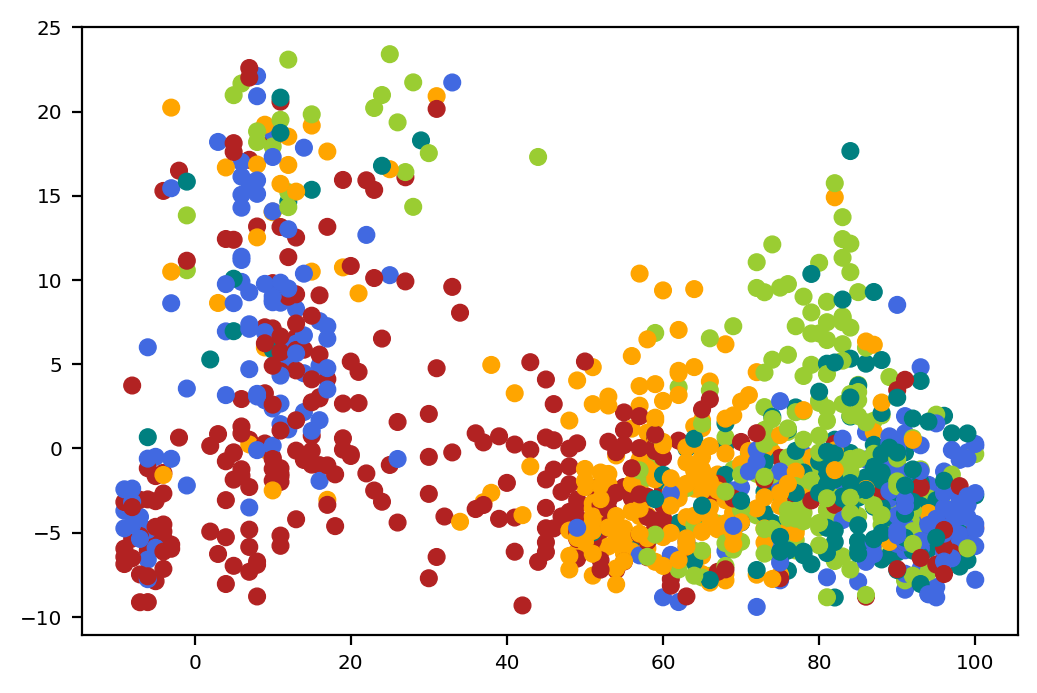

In [46]:
plt.scatter(dose0.obsm['X_RC_adj'][:,0],
            dose0.obsm['X_RC_adj'][:,1],
            c=dose0.obs['CC'].map(colors))

# Plotting new cell cycle representation

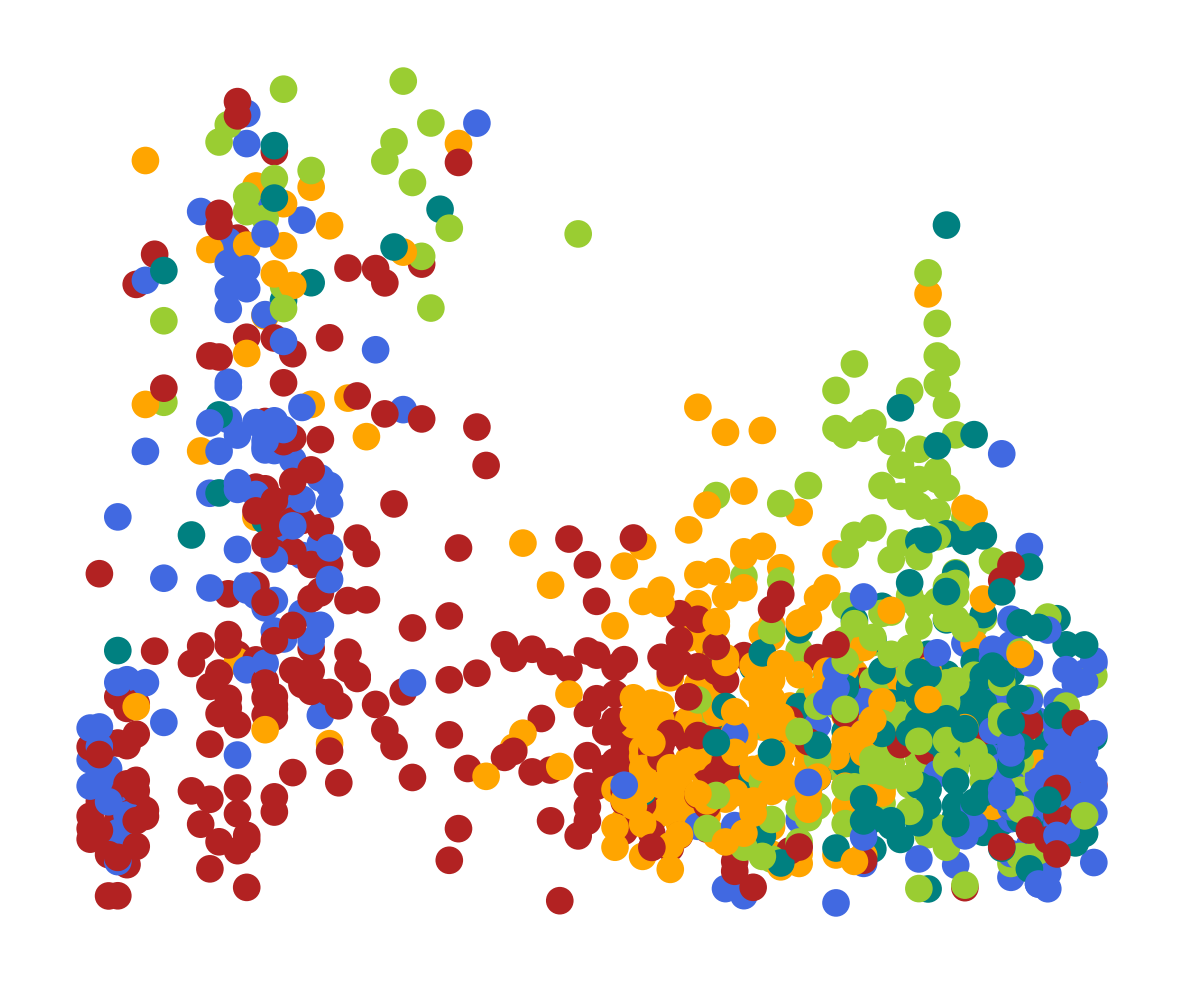

In [63]:
plt.figure(figsize=(3,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
temp = copy.deepcopy(dc_mat_0['RC nneighbor'])
temp[temp > 100] = temp - (np.max(dc_mat_0['RC nneighbor'])+1)
plt.scatter(#dc_mat_0['RC nneighbor'],
            temp,
            dc_mat_0['DC3'],
            c=dc_mat_0['CC'].map(colors),
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_revelio_DC_dose0_cell_cycle_coordinate.png", transparent=True, dpi=300)

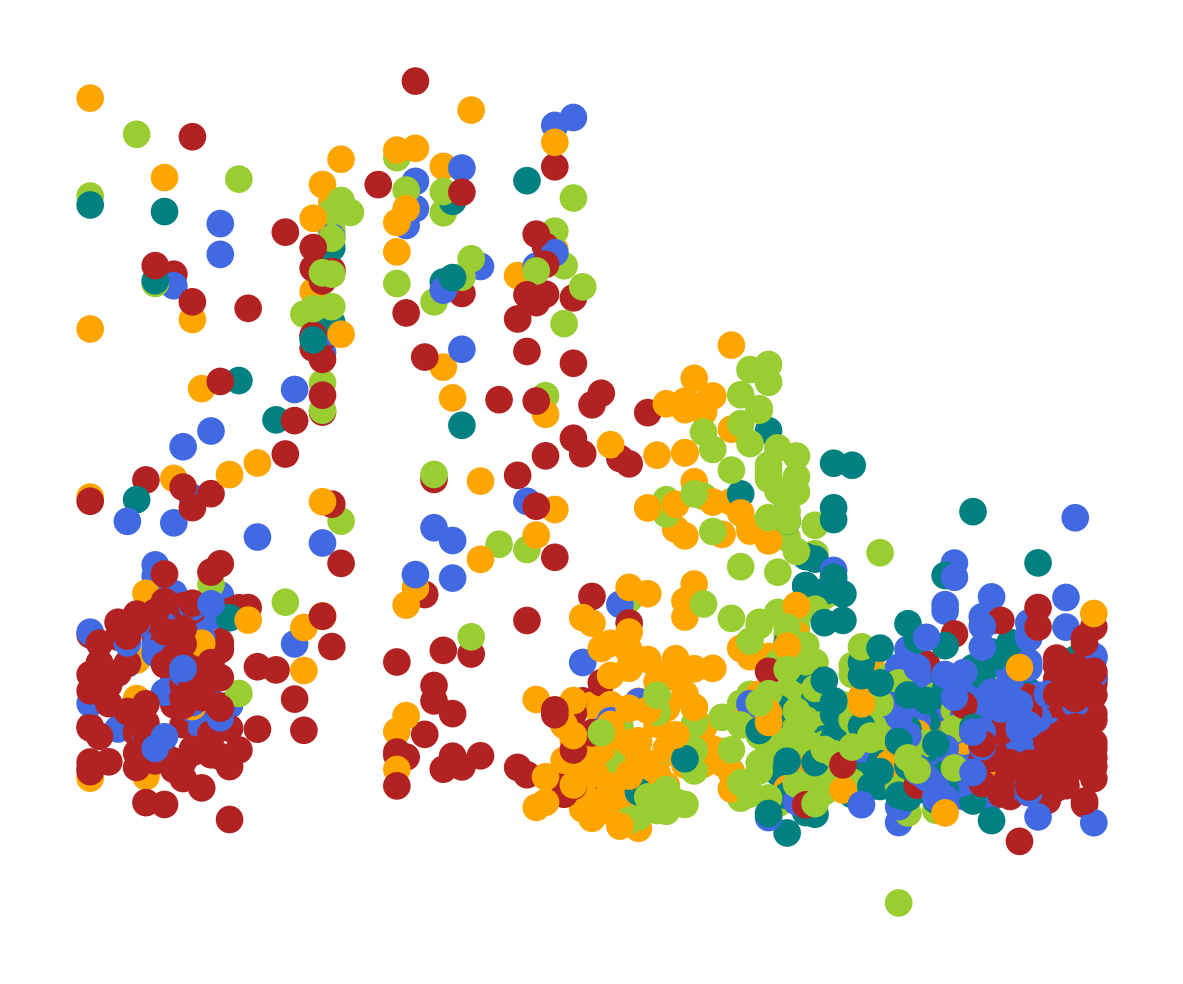

In [62]:
plt.figure(figsize=(3,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dc_mat_12['RC nneighbor'],
            dc_mat_12['DC3'],
            c=dc_mat_12['CC'].map(colors),
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_revelio_DC_dose12_cell_cycle_coordinate.png", transparent=True, dpi=300)

# Revelio DC1 and DC2

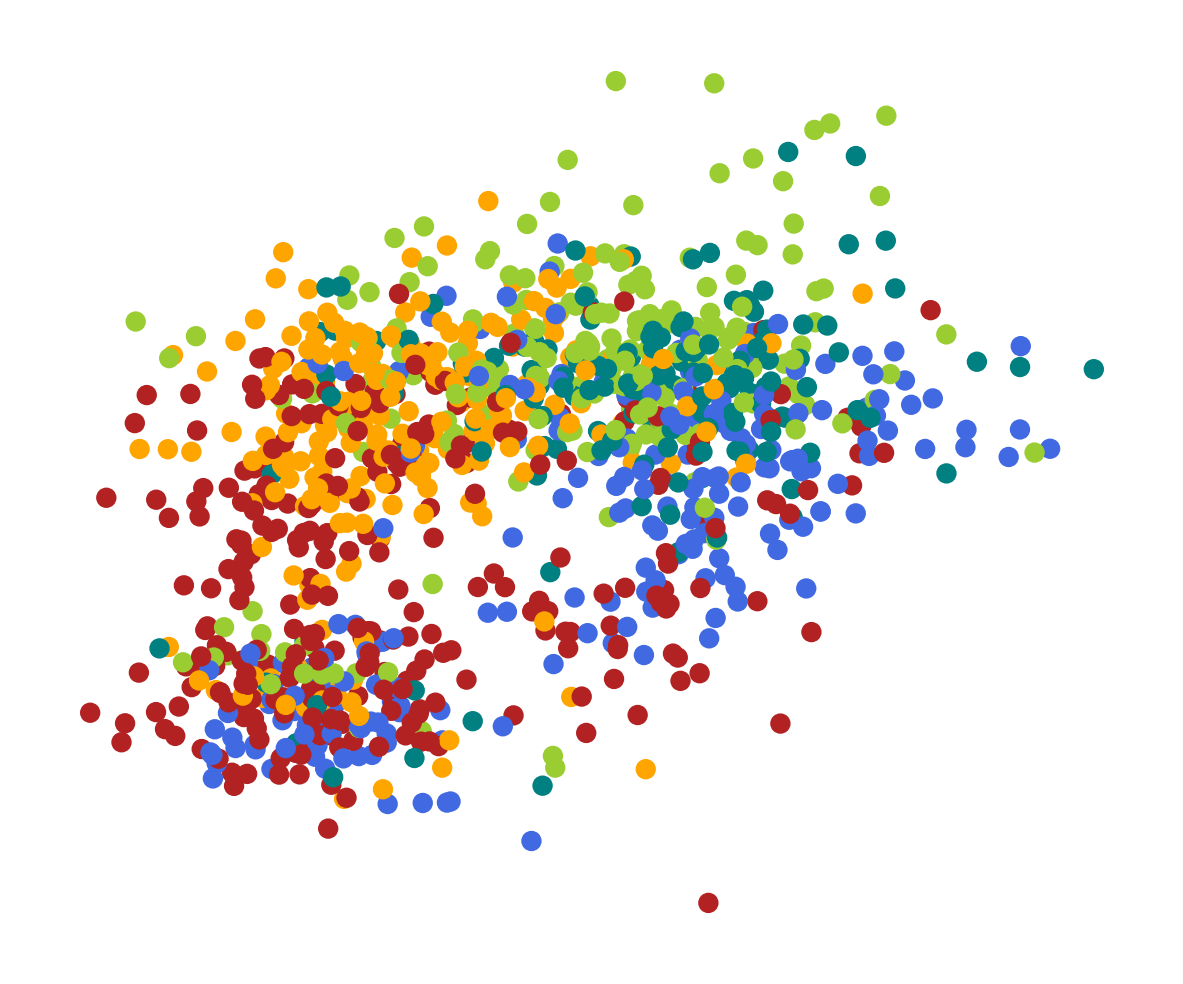

In [43]:
plt.figure(figsize=(3,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dc_mat_0['DC1'],
            dc_mat_0['DC2'],
            c=dc_mat_0['CC'].map(colors),
            s=10
           )
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_revelio_DC_dose0.png", transparent=True, dpi=300)

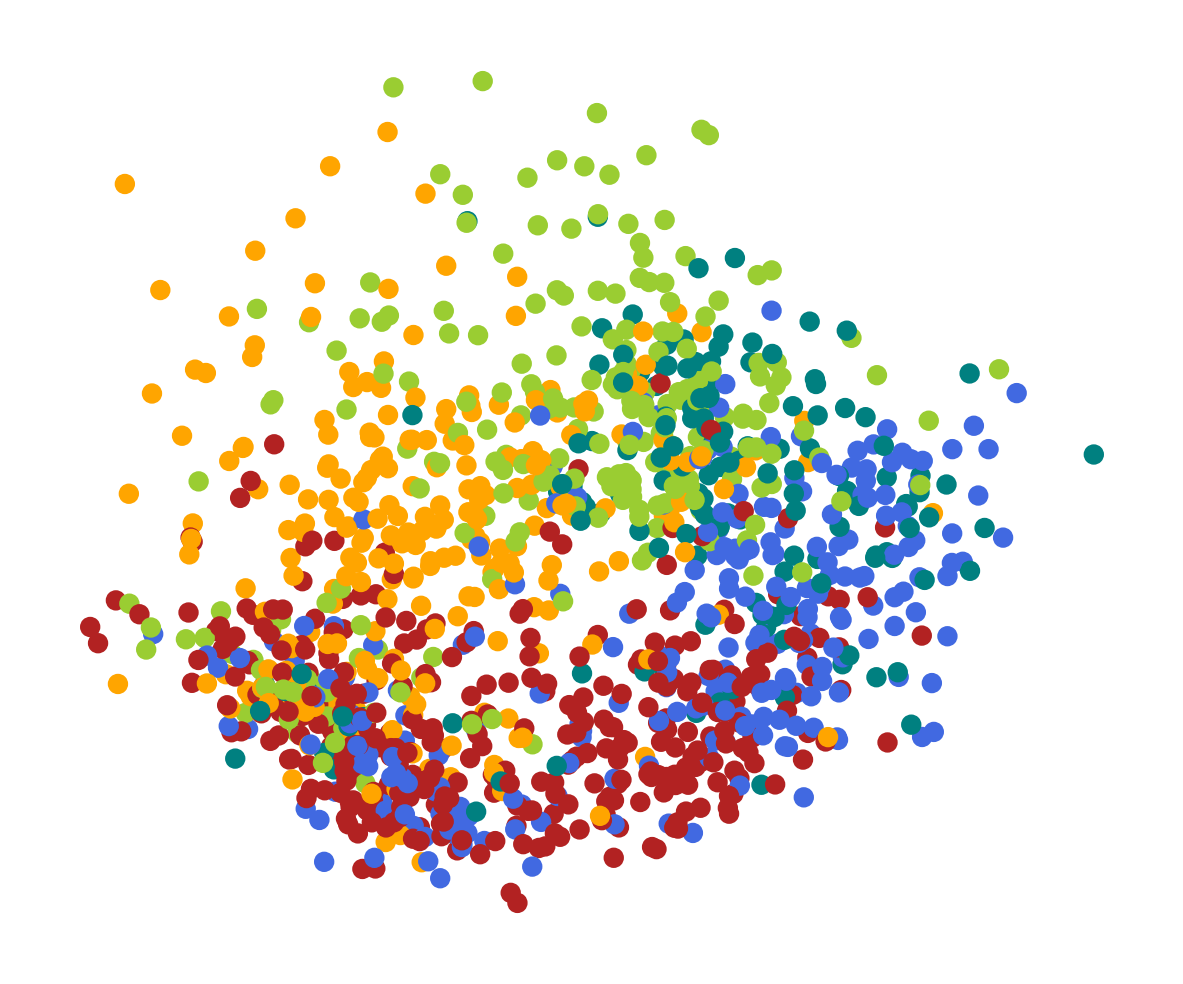

In [44]:
plt.figure(figsize=(3,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dc_mat_12['DC1'],
            dc_mat_12['DC2'],
            c=dc_mat_12['CC'].map(colors),
            s=10
           )
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_revelio_DC_dose12.png", transparent=True, dpi=300)

# Untreated data: Gene expression on the new cell cycle representation 

In [29]:
same_ref_with_density[0].obs.index = same_ref_with_density[0].obs['obs_names']
same_ref_with_density[1].obs.index = same_ref_with_density[1].obs['obs_names']

In [51]:
exp0 = dose0.X.toarray()

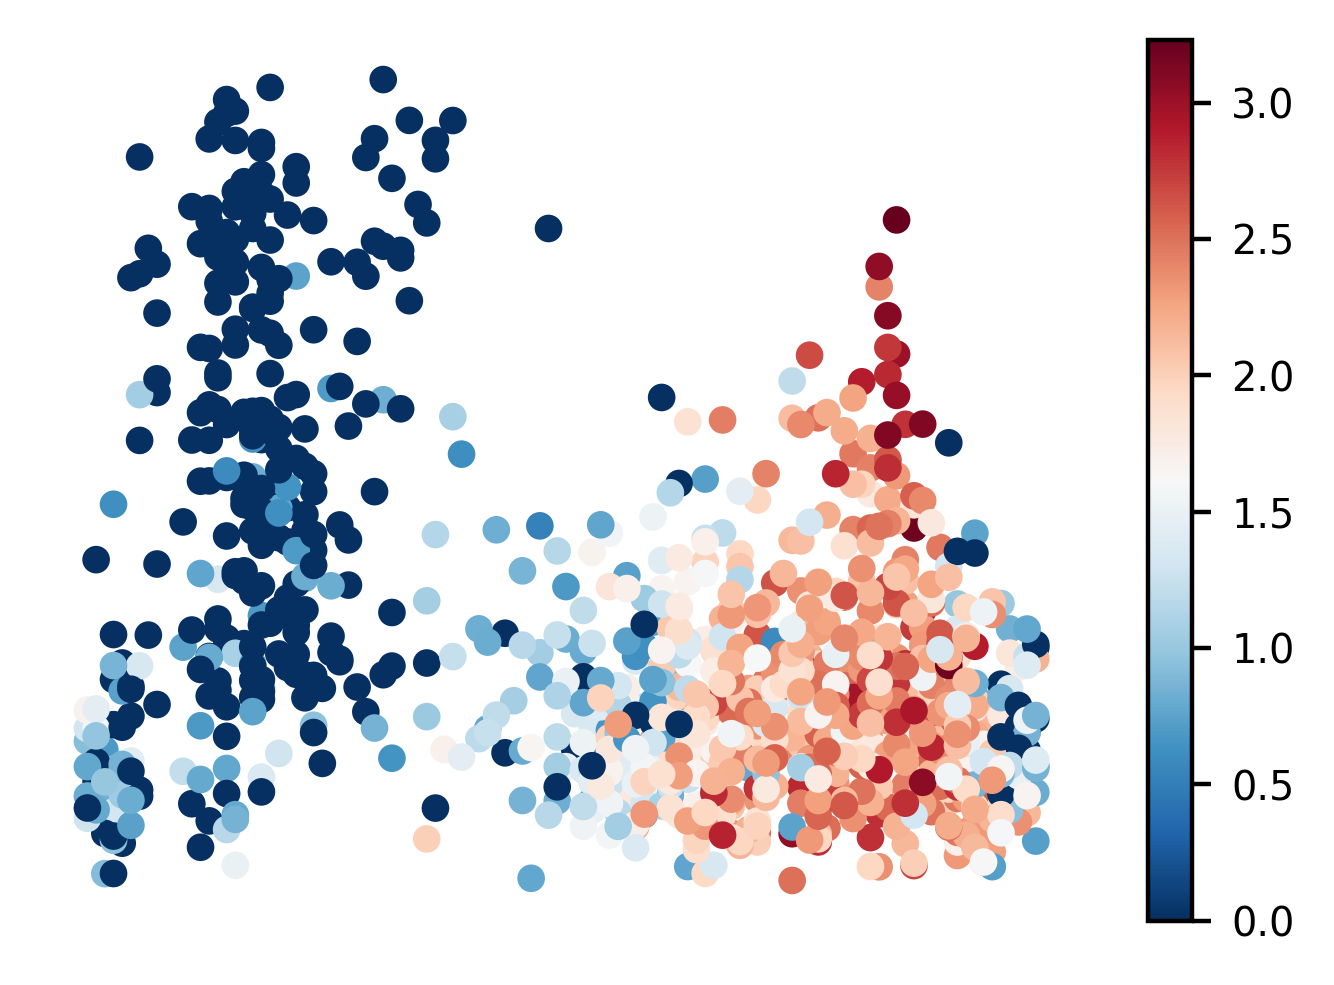

In [52]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'TOP2A'
gene_index = dose0.var.index.get_loc(gene)
plt.scatter(dose0.obsm['X_RC_adj'][:,0],
            dose0.obsm['X_RC_adj'][:,1],
            c=exp0[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

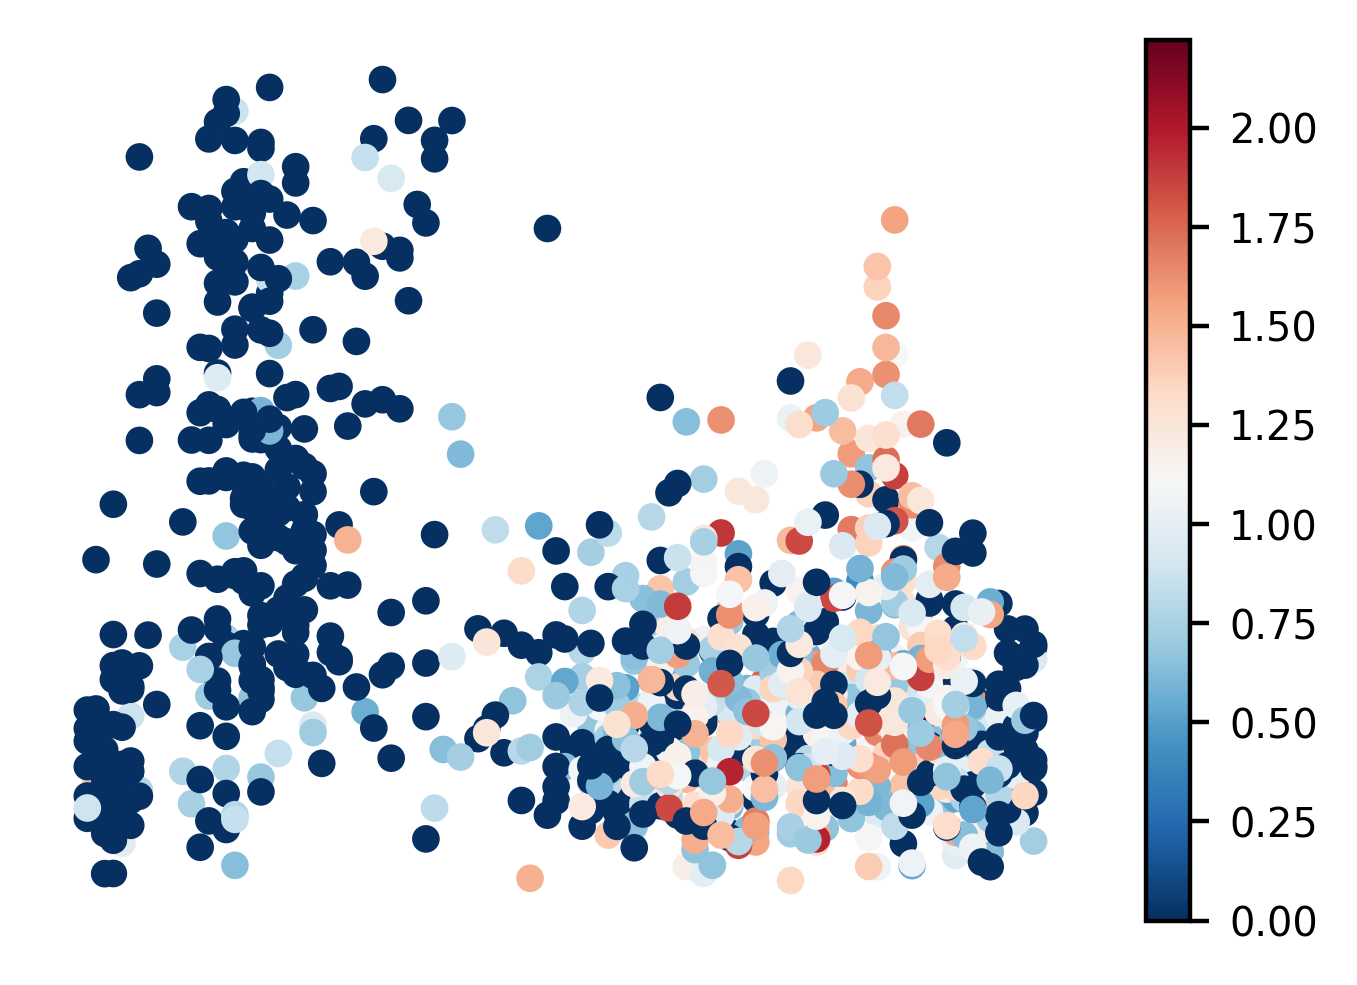

In [53]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'CDK1'
gene_index = dose0.var.index.get_loc(gene)
plt.scatter(dose0.obsm['X_RC_adj'][:,0],
            dose0.obsm['X_RC_adj'][:,1],
            c=exp0[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

# Vector fields on new cell cycle representation

## Untreated cells vector field

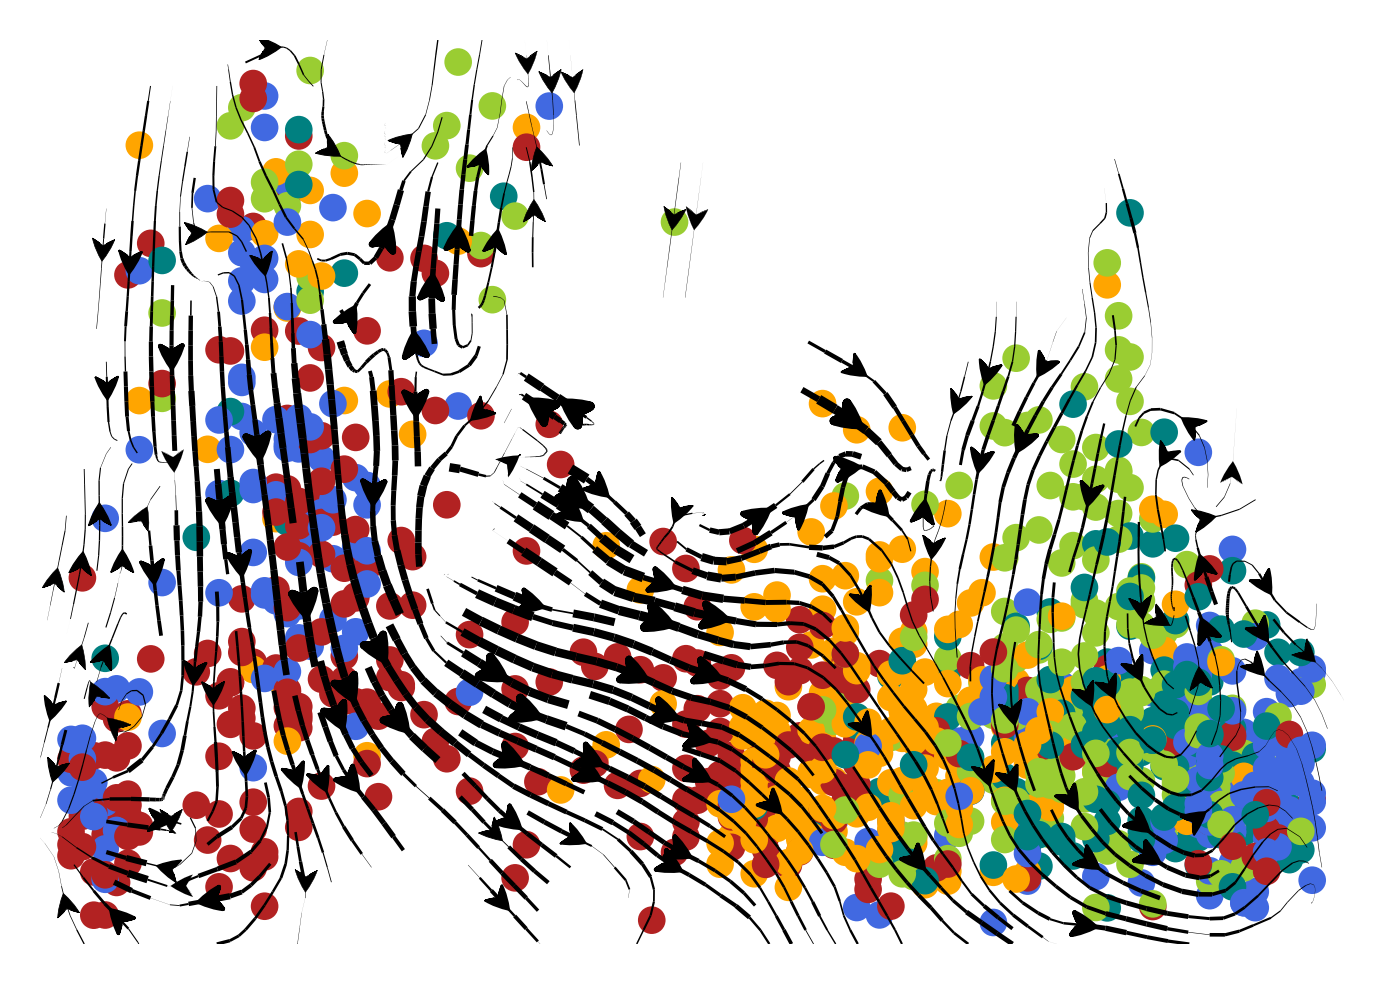

In [56]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose0.obsm['X_RC_adj'][:,0],
            dose0.obsm['X_RC_adj'][:,1],
            c=dose0.obs['CC'].map(colors),
            s=20
           )
dyn.pl.zstreamline(dose0, basis='RC_adj')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig(fig_path + "panelE_untreated_vf_cell_cycle_coordinate.png", transparent=True, dpi=300)

## Dose 12.5 pM tgfb treated vector field

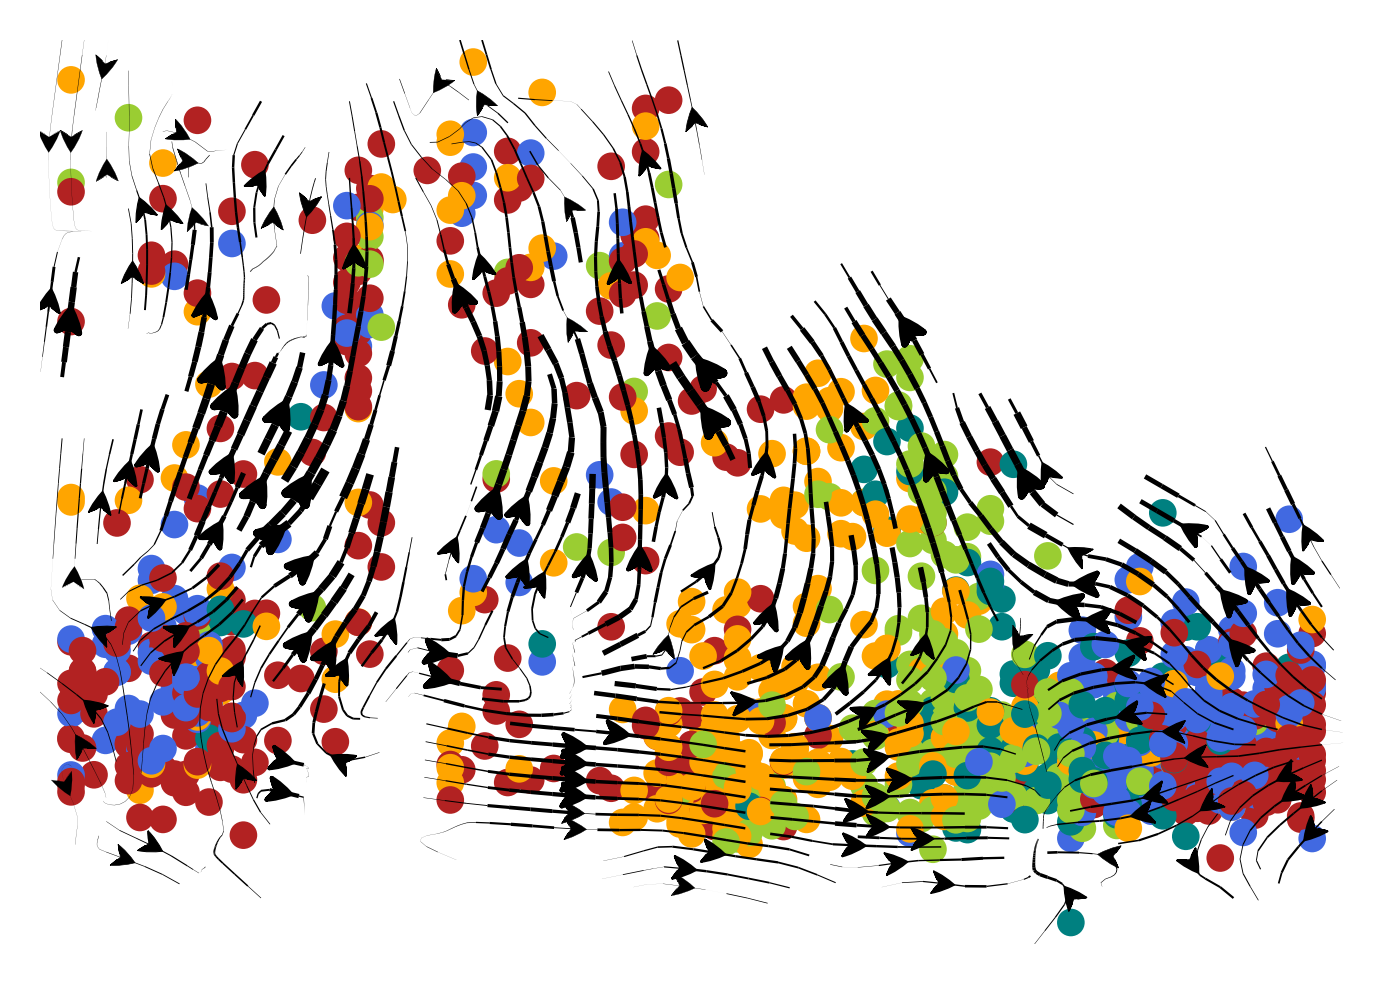

In [80]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)

plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=dose12.obs['cell_cycle_phase'].map(colors2),
            s=20
           )
dyn.pl.zstreamline(dose12, basis='RC')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelE_dose12_vf_cell_cycle_coordinate.png", transparent=True, dpi=300)

# 12.5 pM tgfb data: Gene expression on the new cell cycle-EMT representation

In [ ]:
exp12 = dose12.X.toarray()

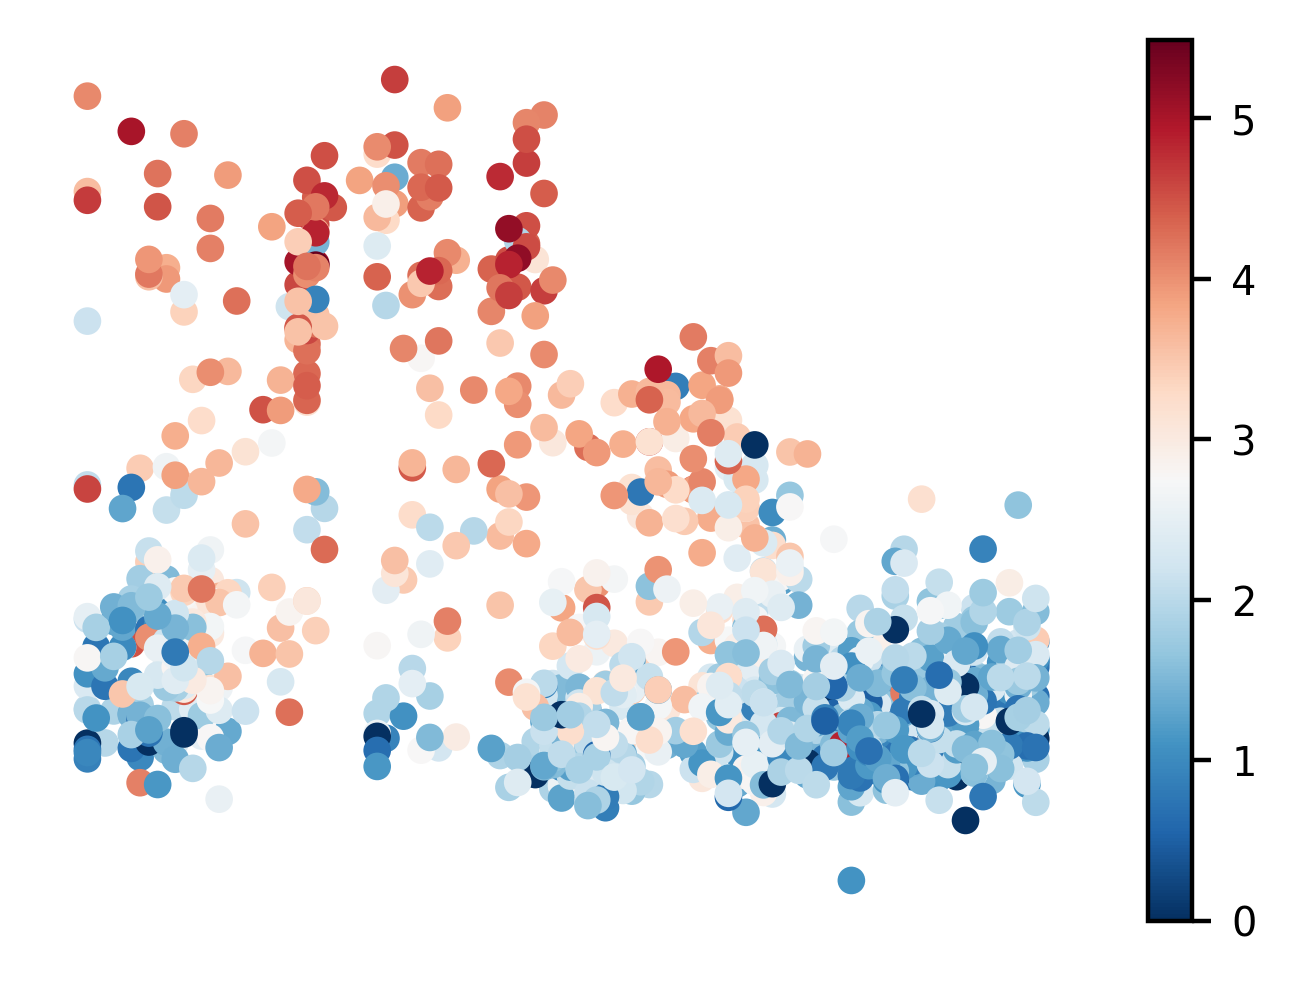

In [96]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'FN1'
gene_index = dose12.var.index.get_loc(gene)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=exp12[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

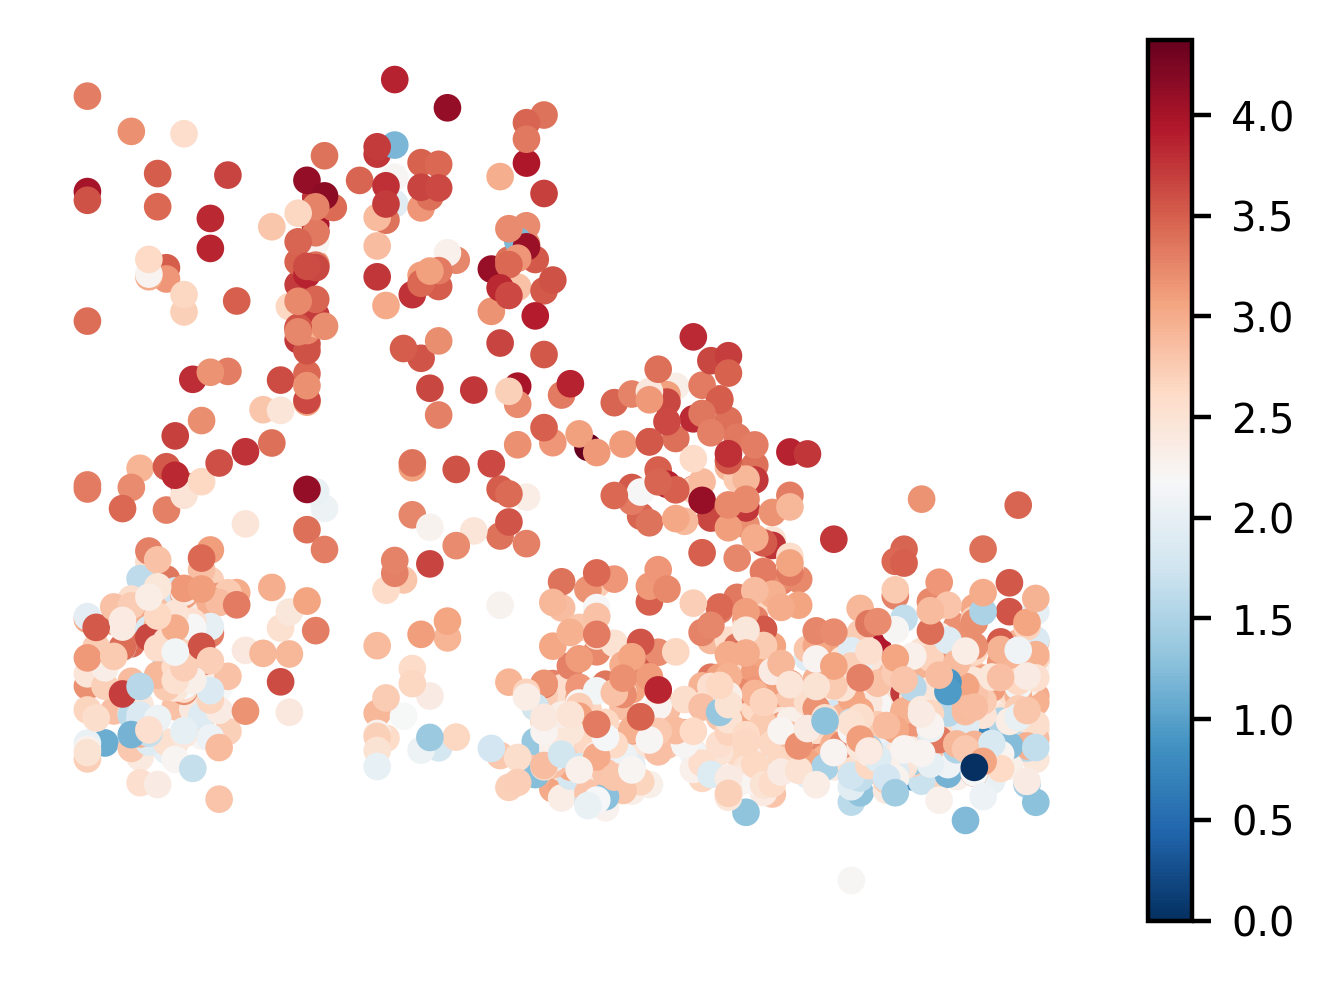

In [97]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'VIM'
gene_index = dose12.var.index.get_loc(gene)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=exp12[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

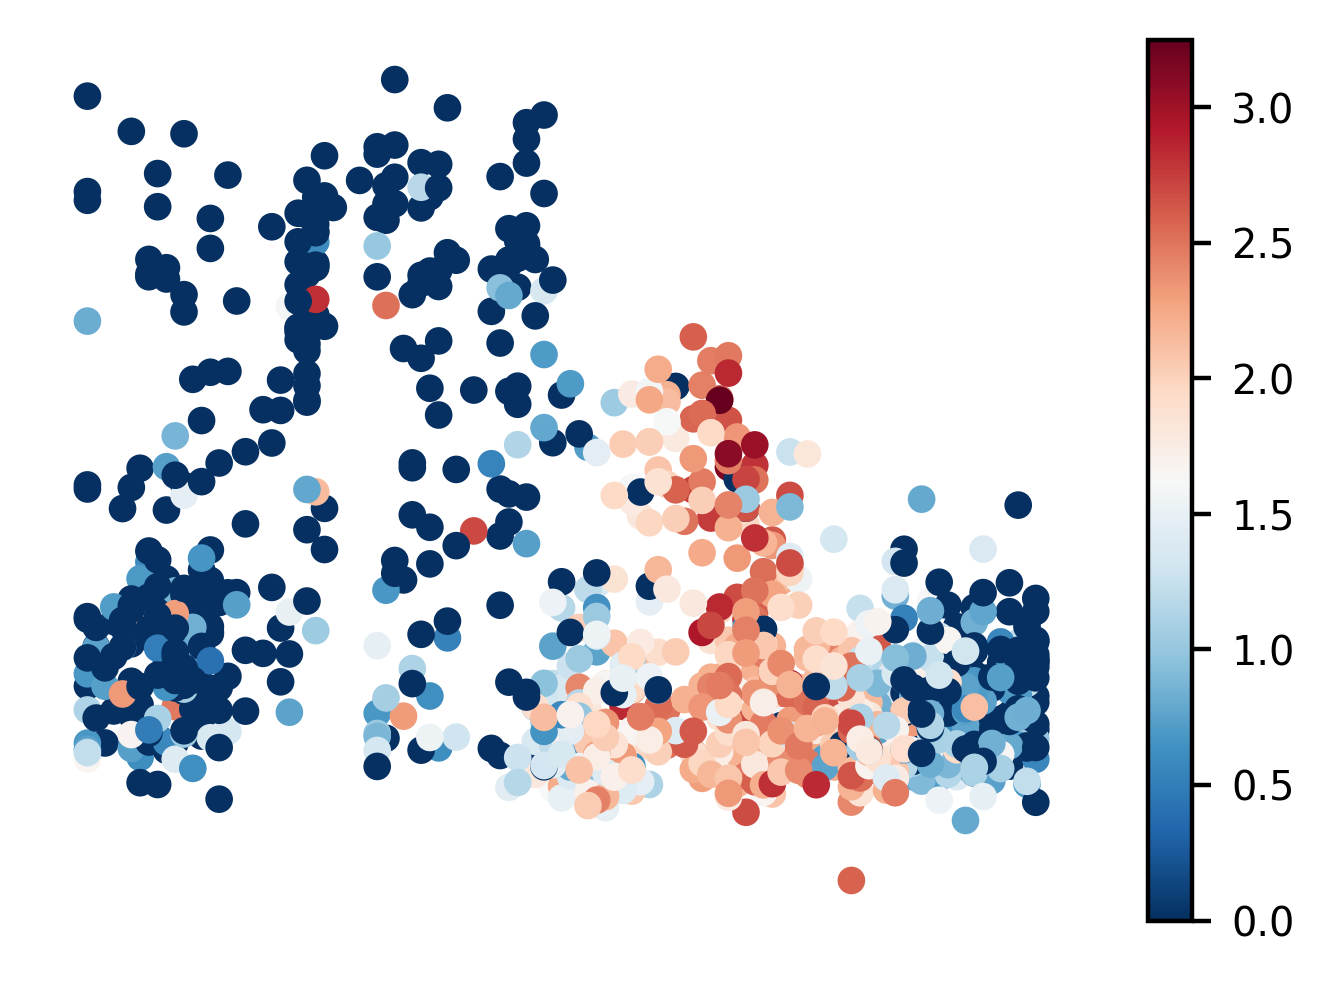

In [98]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'TOP2A'
gene_index = dose12.var.index.get_loc(gene)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=exp12[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

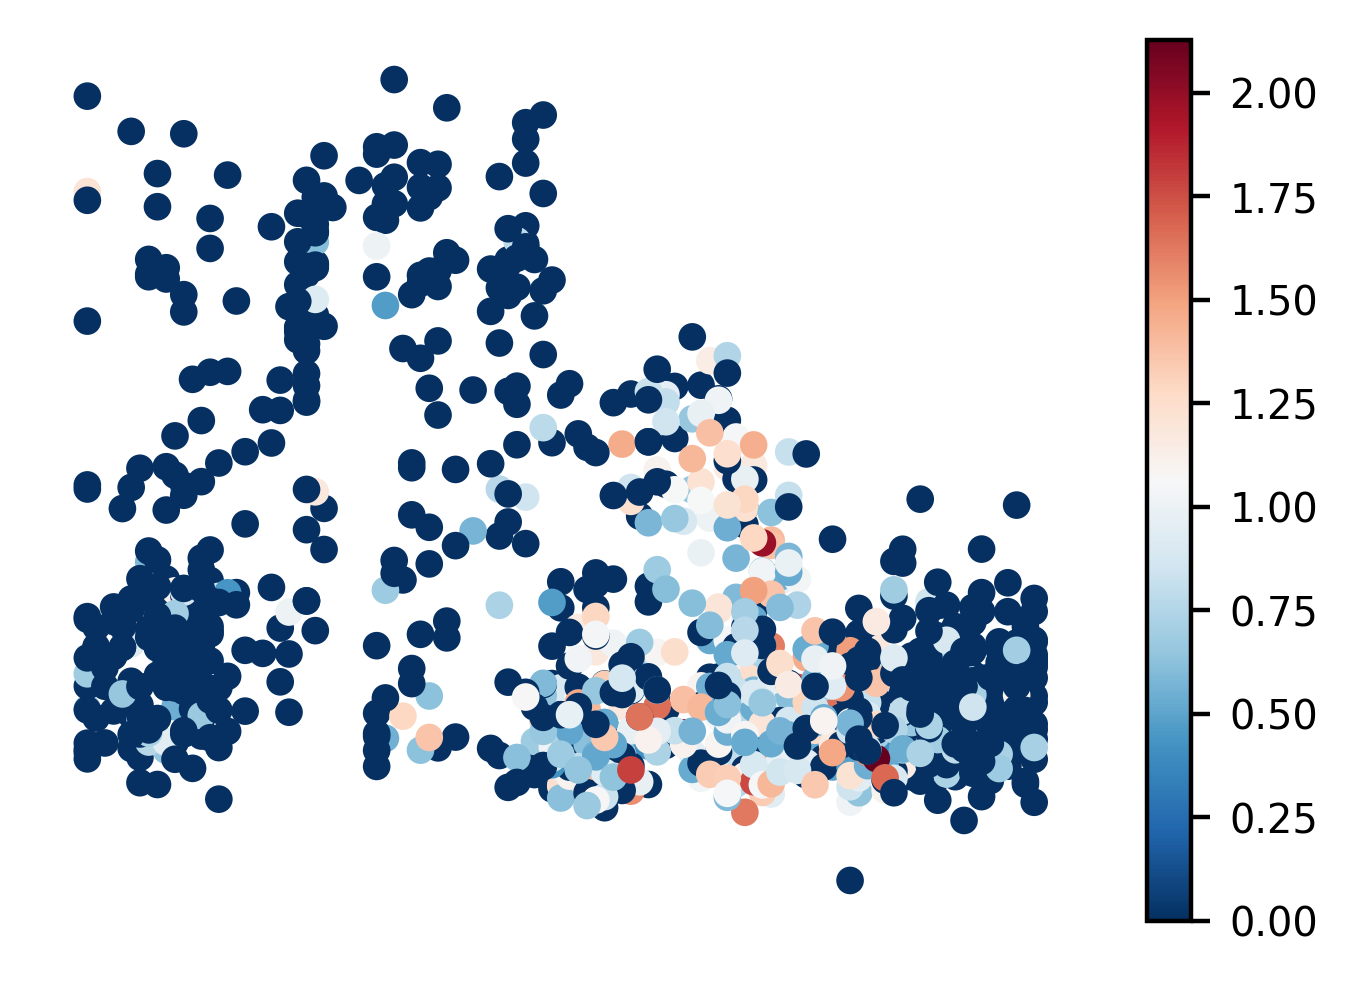

In [99]:
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
gene = 'CDK1'
gene_index = dose12.var.index.get_loc(gene)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=exp12[:,gene_index],
            s=20
           )
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()

# Mapping two cell populations in UMAP space to new cell cycle representation

In [57]:
_, stable, _,_ = getFixedPoints(same_ref_without_density[0], basis='umap')
attractor1_indexes = getNNeighbors([-3.7655506, 0.94708794], 
                                    same_ref_with_density[0].obsm['X_umap'], 
                                    k=175)
attractor2_indexes = getNNeighbors(stable[:,0:2], 
                                   same_ref_with_density[0].obsm['X_umap'], 
                                   k=175)

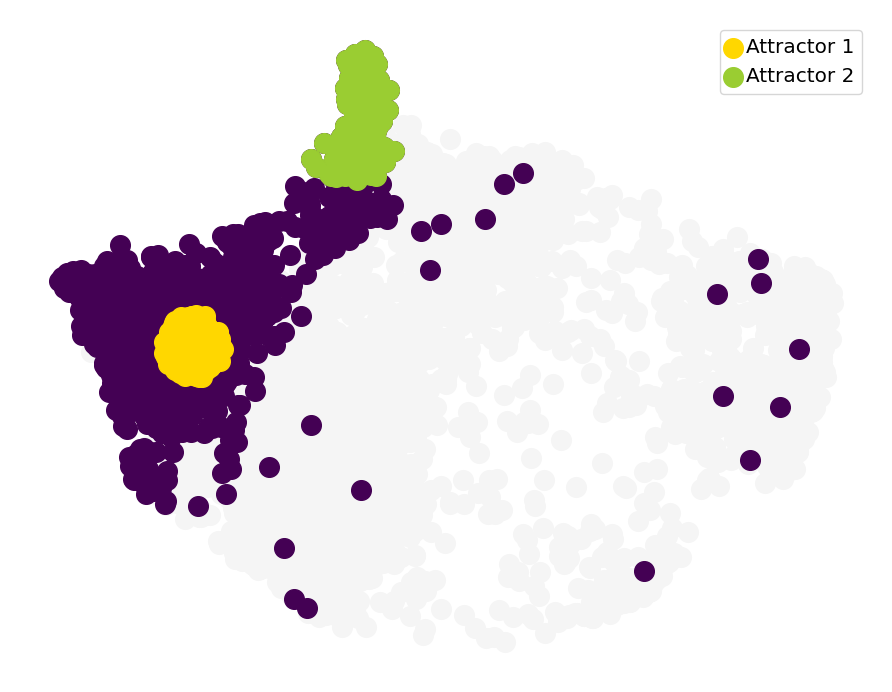

In [41]:
#cmap = plt.get_cmap('Purples_r')
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(4.5,3.5), dpi=100)
plt.subplot(1,1,1, frame_on=False)
for i in range(4):
    plt.scatter(same_ref_without_density[i].obsm['X_umap'][:,0],
                same_ref_without_density[i].obsm['X_umap'][:,1],
                color='whitesmoke',
                s=50)
plt.scatter(same_ref_without_density[0].obsm['X_umap'][:,0],
            same_ref_without_density[0].obsm['X_umap'][:,1],
            color=cmap(0),
            s=50)
cmap = plt.get_cmap('Greens')
plt.scatter(same_ref_without_density[0].obsm['X_umap'][attractor1_indexes,0],
            same_ref_without_density[0].obsm['X_umap'][attractor1_indexes,1],
            color='gold',
            label='Attractor 1',
            s=50)
plt.scatter(same_ref_without_density[0].obsm['X_umap'][attractor2_indexes,0],
            same_ref_without_density[0].obsm['X_umap'][attractor2_indexes,1],
            color='yellowgreen',
            label='Attractor 2',
            s=50)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig(fig_path+"Supp_untreated_G0_comp.png", transparent=True, dpi=300)

In [60]:
attractor1_obs = same_ref_without_density[0][attractor1_indexes[0],:].obs['obs_names']
attractor2_obs = same_ref_without_density[0][attractor2_indexes[0],:].obs['obs_names']

In [61]:
attractor1_indexes = []
for index in attractor1_obs:
    if index in dose0.obs.index.tolist():
        attractor1_indexes.append(index)
        
attractor2_indexes = []
for index in attractor2_obs:
    if index in dose0.obs.index.tolist():
        attractor2_indexes.append(index)

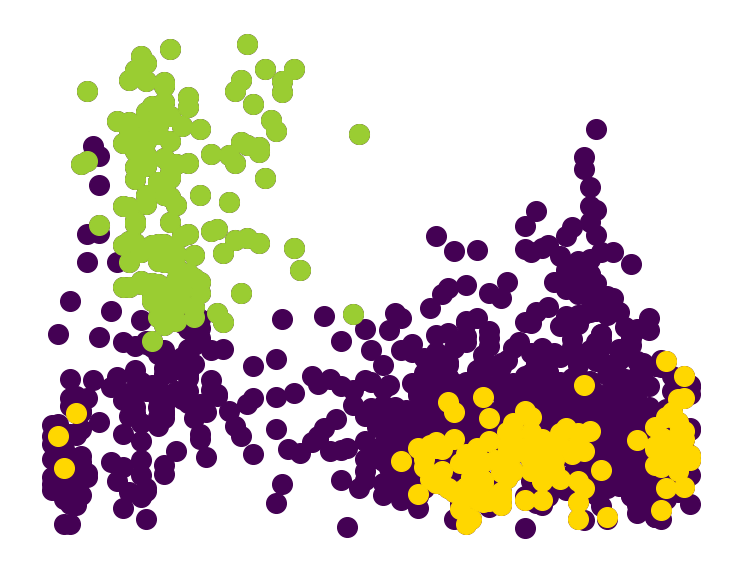

In [80]:
plt.figure(figsize=(4.5,3.5), dpi=100)
plt.subplot(1,1,1, frame_on=False)
cmap = plt.get_cmap('viridis')
plt.scatter(dose0.obsm['X_RC_adj'][:,0],
            dose0.obsm['X_RC_adj'][:,1],
            color=cmap(0),
            s=50)
plt.scatter(dose0[attractor1_indexes].obsm['X_RC_adj'][:,0],
            dose0[attractor1_indexes].obsm['X_RC_adj'][:,1],
            color='gold',
            s=50)
plt.scatter(dose0[attractor2_indexes].obsm['X_RC_adj'][:,0],
            dose0[attractor2_indexes].obsm['X_RC_adj'][:,1],
            color='yellowgreen', 
            s=50)
plt.xticks([])
plt.yticks([])
#plt.savefig(fig_path+"Supp_dose12_G0_comp.png", transparent=True, dpi=300)